In [1]:
import os
import pandas as pd
import configparser as cp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr

In [2]:
CONFIG = os.path.abspath('../config/config.ini')

config = cp.ConfigParser()
config.read(CONFIG)

HOUSE_DATA = config['KC_HOUSE_DATA']['HouseData']

In [3]:
df = pd.read_csv(HOUSE_DATA)
# data = DataCleaning(df)

print(len(df))
# print(data.drop_columns(''))
# print(data.drop_columns('asc'))

df.head()

21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# House Price Correlation Report

## Intro
	The report investigates the correlation between house prices and various house characteristics in the dataset.
	Data will be explored with and without tha aid of specialized data analysis tools and identify relevant functions in Pandas and Seaborn libraries.

## Price calculation
	Price correlation has been calculated mainly with Pearson statistical correlation, both in the use of library functions as with the use of custom functions.
	The use of different types of charts (scatterplots, lineplots, heatmaps, histplots)
	show different movements of the data that can justify the density and correlation between data in terms of time and quantity

## Unraveling Correlations
    In statistics correlation usually refers to the degree to which a pair of variables are linearly related.
    
    Correlation is a statistical measure that illustrates the extent to which two variables change together. A positive correlation indicates that as one variable increases, the other also tends to increase, and vice versa. Conversely, a negative correlation implies that as one variable increases, the other tends to decrease.


               sqft_living     grade  sqft_above  sqft_living15  bathrooms  \
sqft_living       1.000000  0.762704    0.876597       0.756420   0.754665   
grade             0.762704  1.000000    0.755923       0.713202   0.664983   
sqft_above        0.876597  0.755923    1.000000       0.731870   0.685342   
sqft_living15     0.756420  0.713202    0.731870       1.000000   0.568634   
bathrooms         0.754665  0.664983    0.685342       0.568634   1.000000   
view              0.284611  0.251321    0.167649       0.280439   0.187737   
sqft_basement     0.435043  0.168392   -0.051943       0.200355   0.283770   
bedrooms          0.576671  0.356967    0.477600       0.391638   0.515884   
lat               0.052529  0.114084   -0.000816       0.048858   0.024573   
waterfront        0.103818  0.082775    0.072075       0.086463   0.063744   
price             0.702035  0.667434    0.605567       0.585379   0.525138   

                   view  sqft_basement  bedrooms       lat  wat

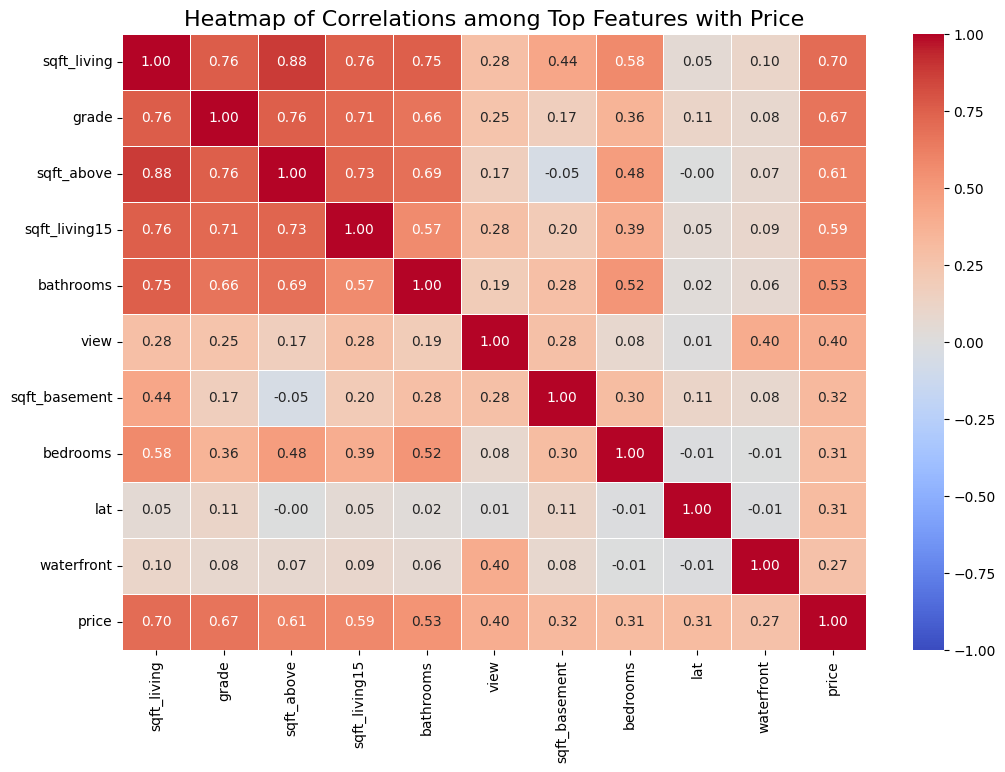

In [4]:
# Calculate the correlation of all features with 'price'
correlations = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
top_correlations = correlations[1:11]
# print(top_correlations)

# Select the top correlated features including Price
selected_features = list(top_correlations.index) + ['price']
# print(selected_features)
 
# Compute the correlations for the selected features (top_correlations)
correlation_matrix = df[selected_features].corr()
print(correlation_matrix)
 
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1)
 
plt.title("Heatmap of Correlations among Top Features with Price", fontsize=16)
 
plt.show()

In [5]:
print(df['price'].describe())

df.describe().T \
    .style \
    .bar(subset=['mean']) \
    .background_gradient(subset=['std'], cmap='Blues') \
    .background_gradient(subset=['50%'], cmap='BuGn')

# sns.histplot(df['price'], kde=True, bins=20)
# plt.xlabel('House Price ($) per 10^6')
# plt.ylabel('Number of Houses')
# plt.title('Distribution of House Prices')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# sns.histplot(df['sqft_living'], kde=True, bins=20)
# plt.xlabel('Square feet living')
# plt.ylabel('Density')
# plt.title('Sqft Living Distributions')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


,count,mean,std,min,25%,50%,75%,max
id,21613.000000,4580301520.864988,2876565571.312057,1000102.000000,2123049194.000000,3904930410.000000,7308900445.000000,9900000190.000000
price,21613.000000,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21613.000000,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21613.000000,2.114757,0.770163,0.000000,1.750000,2.250000,2.500000,8.000000
sqft_living,21613.000000,2079.899736,918.440897,290.000000,1427.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21613.000000,15106.967566,41420.511515,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000
floors,21613.000000,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21613.000000,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000
view,21613.000000,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21613.000000,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000


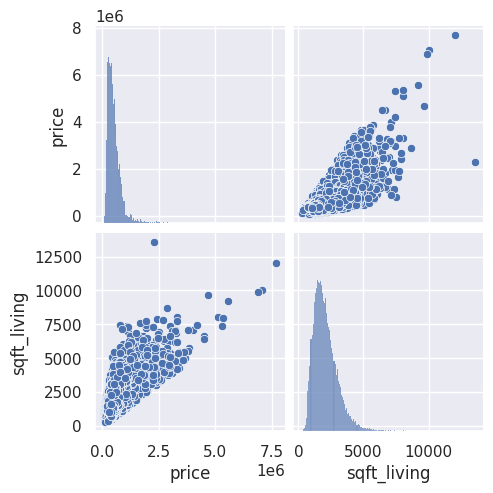

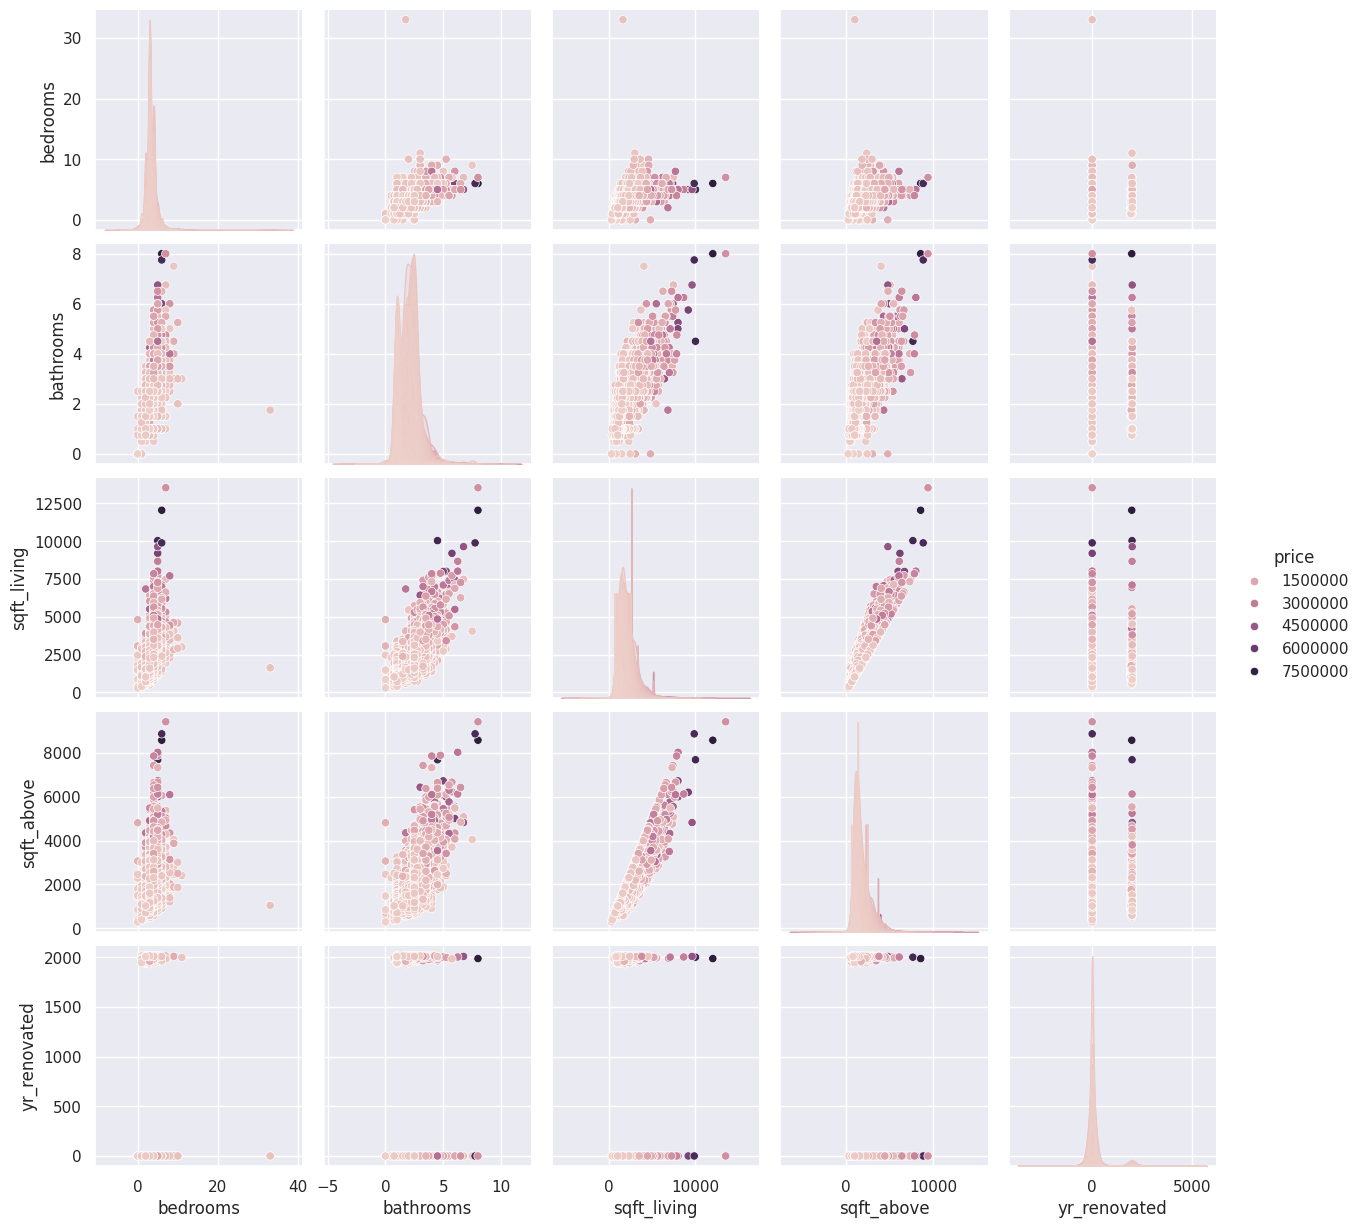

In [12]:
df_pairplot = df[['price', 'sqft_living']]
sns.pairplot(df_pairplot, diag_kind='auto', kind='scatter')

dataset = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'yr_renovated']].dropna()
sns.pairplot(dataset, hue="price", kind='scatter')

In [7]:
# df['date'] = pd.to_datetime(df['date'], format='ISO8601')
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
df['month'] = df['date'].dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df['quarter'] = df['date'].dt.quarter 

print(df[['date', 'month', 'year', 'quarter']])


price_per_timeframe = df.groupby('date')['price'].sum()
print(price_per_timeframe)

            date  month  year  quarter
0     2014-10-13     10  2014        4
1     2014-12-09     12  2014        4
2     2015-02-25      2  2015        1
3     2014-12-09     12  2014        4
4     2015-02-18      2  2015        1
...          ...    ...   ...      ...
21608 2014-05-21      5  2014        2
21609 2015-02-23      2  2015        1
21610 2014-06-23      6  2014        2
21611 2015-01-16      1  2015        1
21612 2014-10-15     10  2014        4

[21613 rows x 4 columns]
date
2014-05-02    35258850.0
2014-05-03     1867880.0
2014-05-04     2883450.0
2014-05-05    48798843.0
2014-05-06    44325976.0
                 ...    
2015-05-13    15860340.0
2015-05-14     6637799.0
2015-05-15      450000.0
2015-05-24      445500.0
2015-05-27     1310000.0
Name: price, Length: 372, dtype: float64


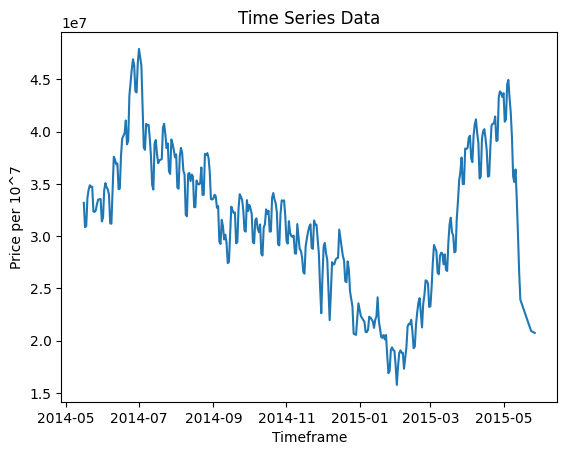

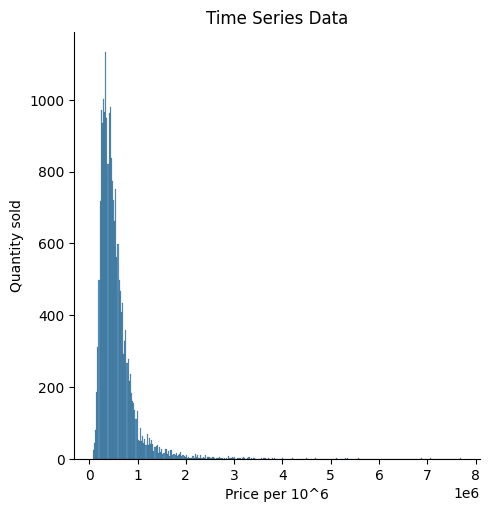

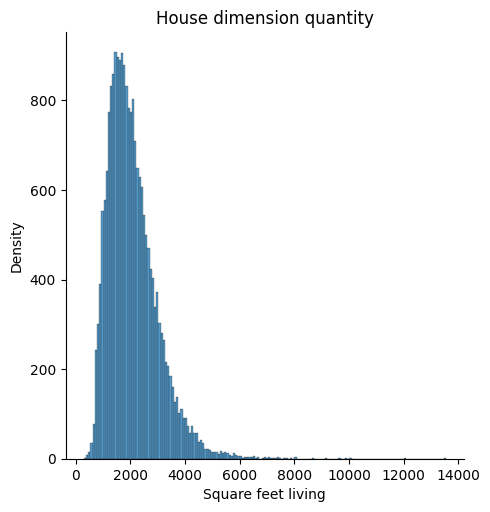

In [8]:
price_per_timeframe_smoothed = price_per_timeframe.rolling(window=15).mean()
plt.plot(price_per_timeframe_smoothed)
plt.plot()
plt.title('Time Series Data')
plt.xlabel('Timeframe')
plt.ylabel('Price per 10^7')
plt.show()

# sns.lineplot(df['price'])
# sns.displot(df['price'], kind="kde")
sns.displot(df['price'])
plt.plot()
plt.title('Time Series Data')
plt.xlabel('Price per 10^6')
plt.ylabel('Quantity sold')
plt.show()

sns.displot(df['sqft_living'])
plt.plot()
plt.title('House dimension quantity')
plt.xlabel('Square feet living')
plt.ylabel('Density')
plt.show()

In [9]:
print(df[['price', 'sqft_living']])
price = df['price']
sqft_living = df['sqft_living']
grade = df['grade']
# sns.scatterplot(price)
# sns.scatterplot(sqft_living)

corr_P, _ = pearsonr(price, sqft_living)
corr_S, _ = spearmanr(price, sqft_living)
print('Pearsons correlation: %.3f' % corr_P)
print('Spearmanr correlation: %.3f' % corr_S)

corr_P, _ = pearsonr(price, grade)
corr_S, _ = spearmanr(price, grade)
print('Pearsons correlation: %.3f' % corr_P)
print('Spearmanr correlation: %.3f' % corr_S)

          price  sqft_living
0      221900.0         1180
1      538000.0         2570
2      180000.0          770
3      604000.0         1960
4      510000.0         1680
...         ...          ...
21608  360000.0         1530
21609  400000.0         2310
21610  402101.0         1020
21611  400000.0         1600
21612  325000.0         1020

[21613 rows x 2 columns]
Pearsons correlation: 0.702
Spearmanr correlation: 0.644
Pearsons correlation: 0.667
Spearmanr correlation: 0.658


# Interpreting Scatterplots: 

## Positive association
	This occur when the points in the scatterplot tend to move diagonally upward from left to right
	As the value of one increases, the value of the other variable also tends to increase


## Negative association
	This occur when the points in the scatterplot tend to move diagonally downward from left to right
	As the value of one increases, the valule of the other variable also tends to increase

## Linear vs Non-linear
	Linear is a trend where the points tend to follow a straight line (positive/negative association)
	Non-linear ->
		curved trend : more complex relationship where rate of change of one variable is not constant as the other variable changes
		clusters : points might form distinct clusters in different areas of the plot, indicating potential subgroups within data

## Strength of association
	Strong association : points form a tight cluster around a well-defined trendline
	Weak association : points are more scattered and do not follow a clear trendline 

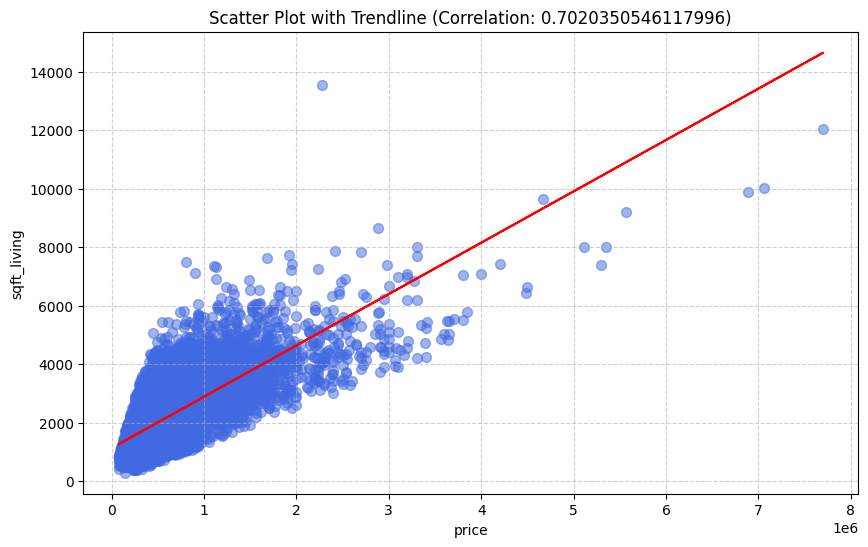

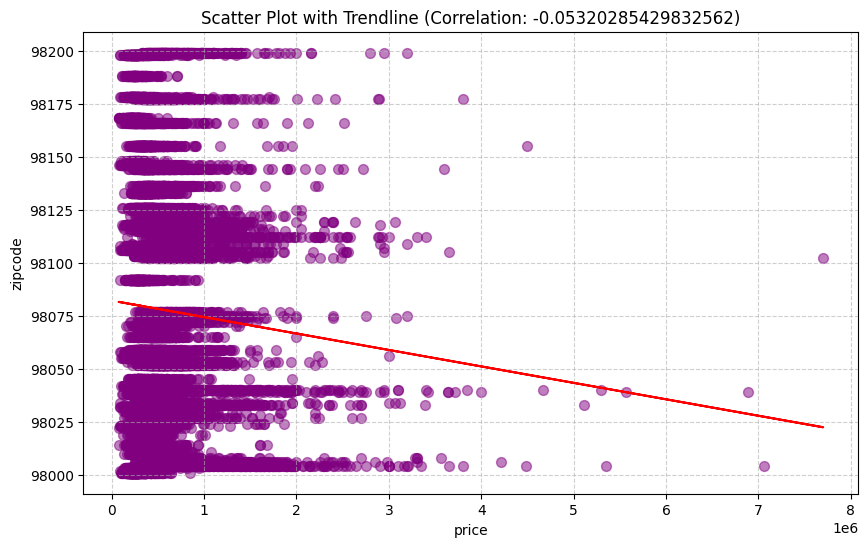

<Figure size 1000x600 with 0 Axes>

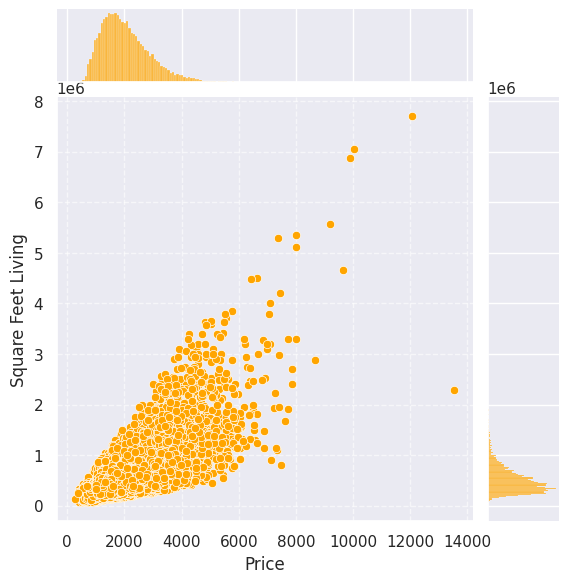

In [10]:
price = df['price']
sqft_living = df['sqft_living']


# Using Pearsonr correlation
correlation = price.corr(sqft_living)

# Scatter Plot with Trendline [price - square feet living]
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['sqft_living'], alpha=0.5, s=50, c='royalblue')
m, b = np.polyfit(price, sqft_living, 1)  # Linear regression
plt.plot(price, m * price + b, color='red')  # Trendline
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('Scatter Plot with Trendline (Correlation: {})'.format(correlation))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter Plot with Trendline [price - zipcode]
correlation_z = price.corr(df['zipcode'])
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['zipcode'], alpha=0.5, s=50, c='purple')
m, b = np.polyfit(price, df['zipcode'], 1)  # Linear regression
plt.plot(price, m * price + b, color='red')  # Trendline
plt.xlabel('price')
plt.ylabel('zipcode')
plt.title('Scatter Plot with Trendline (Correlation: {})'.format(correlation_z))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Creates joint plots with histograms and scatterplots for exploring bivariate distributions.
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
df_sns = pd.DataFrame({'x': df['price'], 'y': df['sqft_living']})

sns.jointplot(
    x="sqft_living",
    y="price",
    color="orange",
    data=df
)

plt.xlabel('Price')
plt.ylabel('Square Feet Living')
# plt.title('Price vs Sqft Living (Correlation: {:.2f})'.format(correlation))

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Pearson Correlation Coefficient

## Measures the strength and direction of the linear relationship between two variables
## Denoted by symbol r and ranges from -1 to +1

    r = nΣxy / (Σx² * Σy²)^(1/2)

    r is the correlation coefficient
    n is the number of data pairs
    Σ (sigma) represents the sum
    x and y are the variables
    xy is the product of each x and y value
    x^2 and y^2 are each variable squared

## Steps to calculate the correlation coefficient manually
    - Find the mean of each variable (x and y)
    - For each data pair, subtract the mean of x from x and subtract the mean of y from y. (this is called centering data)
    - Multiply the centered values of x and y together for each data pair
    - Square each of the centered x values and each of the centered y values
    - Sum the products of xy (3rd step), the squared centered x values (4th step), and the squared centered y values (4th step)
    - Multiply the number of data pairs (n) by the sum of the xy products (5th step)
    - Multiply the sum of the squared centered x values (5th step) by the sum of the quared centered y values (5th step)
    - Take the square root of the product in 7th step
    - Divide the result from 6th step by the result from 8th step


<!-- x = df['price']. -->

In [11]:
def pearson_correlation(x, y):
	"""
	Function calculates Pearson correlation coefficient between two lists

	Args:
		x, y: Lists of numerical values

	Returns:
		The Pearson correlation coefficient between x and y
	"""

	# Calculate means
	mean_x = sum(x) / len(x)
	mean_y = sum(y) / len(y)

	# Centering the data
	centered_x = []
	centered_y = []
	for valx, valy in zip(x, y):
		centered_x.append(valx - mean_x)
		centered_y.append(valy - mean_y)

	# Calculate numerator (sum of products of centered data)
	numerator = 0
	for a, b in zip(centered_x, centered_y):
		numerator += a * b

	# Calculate denominator (square root of product of variances)
	squared_sum_x = 0
	squared_sum_y = 0
	for valx, valy in zip(centered_x, centered_y):
		squared_sum_x += valx**2
		squared_sum_y += valy**2

	denominator = (squared_sum_x * squared_sum_y)**0.5

	# Handle division by zero
	if denominator == 0:
		return 0

	# Calculate and return correlation coefficient
	correlation = numerator / denominator
	return correlation


custom = pearson_correlation(price, sqft_living)
print("Custom pearson correlation coefficient:", custom)

correlation_list = []
for col in df.columns.sort_values():
	correlation_list.append(round(pearson_correlation(price, df[col].astype(int)), 3))

for x in correlation_list:
	print(float(x))


Custom pearson correlation coefficient: 0.7020350546118009
0.51
0.308
0.036
-0.004
0.237
0.667
-0.017
0.0
-0.015
-0.01
1.0
-0.009
0.606
0.324
0.702
0.585
0.09
0.082
0.397
0.266
0.004
0.054
0.126
-0.053
